# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [71]:
import pandas as pd
import numpy as np

In [72]:
#Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. 
#Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

env = pd.read_csv('data/Arrigetch_Peaks_Environmental_Data.csv')
species = pd.read_csv('data/Arrigetch_Peaks_Species_Data.csv')

In [73]:
env.head()

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090,45,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920,315,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950,225,-9999,0,0,0,0,0,Umbilicaria arctica = in original Umbilicaria ...
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...


In [74]:
species.head()

,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [75]:
print("Dimensions of env: " + str(env.shape[0]) + " rows, " + str(env.shape[1]) + " columns")
print("Dimensions of env: " + str(species.shape[0]) + " rows, " + str(species.shape[1]) + " columns")

Dimensions of env: 439 rows, 11 columns
Dimensions of env: 439 rows, 409 columns


In [79]:
#Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

species = species.replace(-9999, np.nan)
env = env.replace(-9999, np.nan)


In [80]:
#Print how many unique plant community names there are. (1 pt)

print("Unique Plant Community names: " + str(len(env['PLANT_COMMUNITY_NAME'].unique())))

Unique Plant Community names: 51


In [81]:
#Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

env[env.columns[1:-1]].describe()

,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL
count,374.000000,244.000000,147.0,439.000000,439.0,439.000000,439.000000,439.000000
mean,1111.802139,184.241803,0.0,36.913440,0.0,13.936219,4.341686,14.321185
std,227.223605,103.151667,0.0,30.059329,0.0,18.166670,12.113122,17.990339
min,730.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,940.000000,135.000000,0.0,8.000000,0.0,1.000000,0.000000,1.000000
50%,1050.000000,180.000000,0.0,30.000000,0.0,8.000000,0.000000,8.000000
75%,1270.000000,270.000000,0.0,65.000000,0.0,20.000000,0.000000,20.000000
max,1920.000000,360.000000,0.0,100.000000,0.0,95.000000,80.000000,85.000000


In [82]:
#Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)
merged_inner = pd.merge(left=env, right=species, left_on='TURBOVEG_PLOT_NUMBER', right_on='TURBOVEG_PLOT_NUMBER')

merged_inner

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090.0,45.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920.0,315.0,NaN,0,0,0,0,0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940.0,270.0,NaN,0,0,0,0,0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950.0,225.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935.0,270.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,11359,Carex podocarpa-Salix rotundifolia comm.,960.0,NaN,0.0,10,0,10,0,1,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
435,11360,Senecio tomentosus-Salix rotundifolia comm.,1520.0,360.0,NaN,5,0,3,15,3,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
436,11361,Senecio tomentosus-Salix rotundifolia comm.,1520.0,360.0,NaN,0,0,5,20,5,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
437,11362,Senecio tomentosus-Salix rotundifolia comm.,1550.0,360.0,NaN,5,0,0,10,8,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [84]:
#How many rows in the merged data frame contain missing data? (1 pt)

print(str(merged_inner[merged_inner.isnull().any(axis=1)].shape[0]) + " rows contain missing data")

422 rows contain missing data


In [85]:
#Which species was present in the most plots? (3 pt)

max_species_number = 0
max_species_name = ""

for (columnName, columnData) in species.loc[:, species.columns != 'TURBOVEG_PLOT_NUMBER'].iteritems():
    present = len([x for x in columnData if x != 0])
    
    if present > max_species_number:
        max_species_number = present
        max_species_name = columnName

print(max_species_name + " present the most, in " + str(max_species_number) + " plots")

Cetraria islandica present the most, in 229 plots


In [86]:
#For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. 
#Add this sum as a new column called `"totals"`. (2 pt)

totals = []
for index, row in species.iterrows():
    totals.append(row[1:].sum())

species = species.assign(totals=totals)

species.head()

,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans,totals
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,79.5
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,101.0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,135.5
3,10928,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,84.0
4,10929,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,84.5


In [54]:
#Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. 
#If there are inconsistences, what would you do to correct them? (2 pt)

#Answer:
#The description of the data says that the data values are cover classes but it seems like the actual data values are cover peercentages
#To correct them, we could go through each value in the dataframe and calssify the percentage value into a class value
#for ex. if the data value is 64, we would replacc4e that value with 4 (for class 4).

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

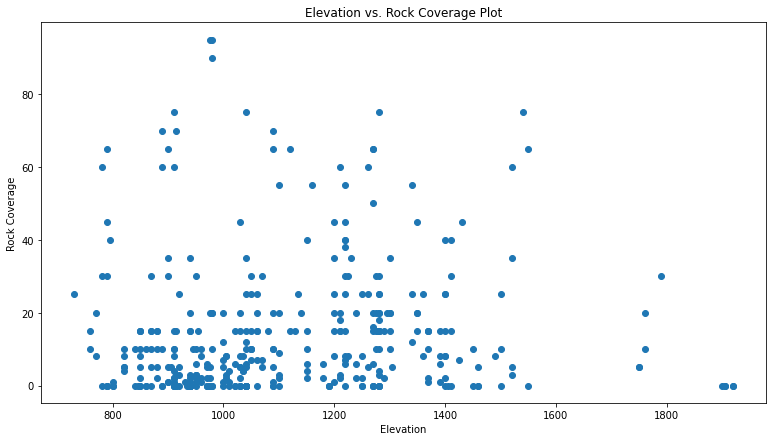

In [100]:
#Make a figure showing the relationship between elevation and cover rock percentage. 
#Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)
figure, ax = plt.subplots()
ax.scatter(env['ELEVATION'], env['COVER_ROCK'])
ax.set_xlabel('Elevation') # x axis label
ax.set_ylabel('Rock Coverage') # y axis label
ax.set_title('Elevation vs. Rock Coverage Plot')
plt.show()

There seems to be no relationship between elevation and rock coverage

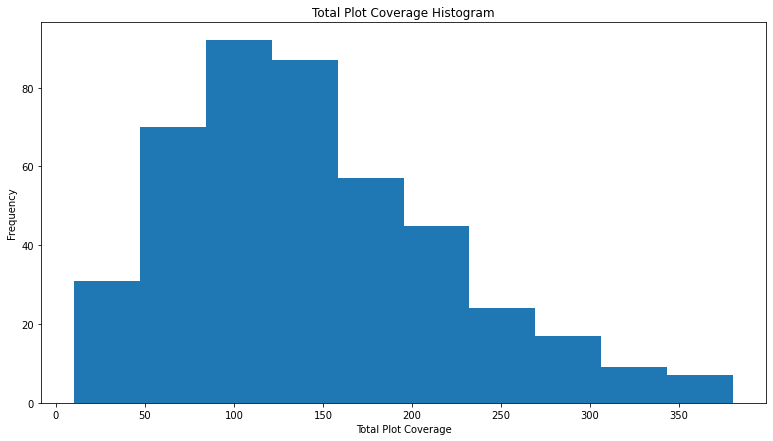

Summary Statistics


count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64

In [99]:
#Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

figure, ax = plt.subplots() # create blank figure and axes
ax.hist(species['totals']) # add histogram to axes
ax.set_xlabel('Total Plot Coverage') # x axis label
ax.set_ylabel('Frequency') # y axis label
ax.set_title('Total Plot Coverage Histogram')
plt.show() # display figure

print("Summary Statistics")
species['totals'].describe()

In [92]:
#Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

env_subset = env.loc[(env['PLANT_COMMUNITY_NAME'] == 'Caricetum scirpoideae-rupestris') 
                     | (env['PLANT_COMMUNITY_NAME'] == 'Pedicularo kanei-Caricetum glacialis')
                     | (env['PLANT_COMMUNITY_NAME'] == 'Saxifrago tricuspidatae-Artemisietum alaskanae')]

env_subset.head()

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
253,11178,Caricetum scirpoideae-rupestris,1020.0,270.0,NaN,60,0,15,0,12,Published releves in Table 19 (Cooper 1986) un...
254,11179,Caricetum scirpoideae-rupestris,1030.0,270.0,NaN,25,0,45,0,35,Published releves in Table 19 (Cooper 1986) un...
255,11180,Caricetum scirpoideae-rupestris,1050.0,315.0,NaN,40,0,25,0,25,Published releves in Table 19 (Cooper 1986) un...
256,11181,Caricetum scirpoideae-rupestris,1040.0,315.0,NaN,60,0,12,0,8,Published releves in Table 19 (Cooper 1986) un...
257,11182,Caricetum scirpoideae-rupestris,1090.0,315.0,NaN,65,0,0,0,25,Published releves in Table 19 (Cooper 1986) un...


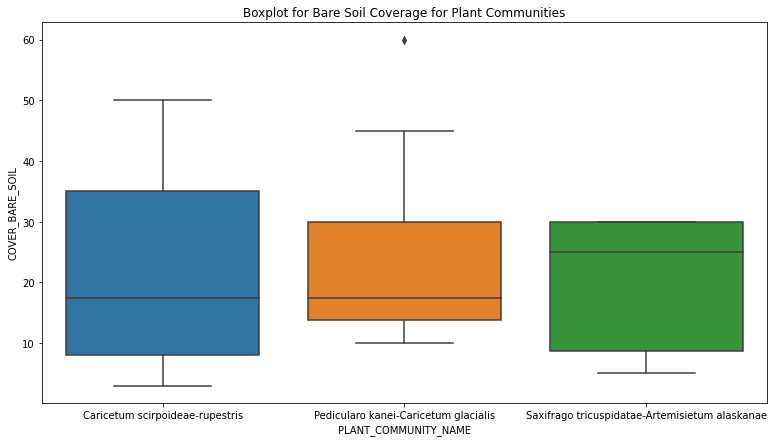

In [102]:
#Create a figure to compare the mean cover bare soil percentage of the plant communities. 
#Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? 
#Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

plt.rcParams["figure.figsize"] = [13, 7]
sns.boxplot(data=env_subset, x="PLANT_COMMUNITY_NAME", y="COVER_BARE_SOIL")
plt.title('Boxplot for Bare Soil Coverage for Plant Communities')
plt.show()

This figure shows us the spread of bare soil cover data for these three plant communities. The box shows us where msot of the data resides, in quartile 2 and 3. The line in the middle of the box is the median. The upper and lower bounds of the box are the upper and lower quartiles respectively. The lower "whisker" is the first quartile of the data, the lower limit being the minimum. The upper "whisker" is the fourth quartile of the data, the upper limit being the maximum. Any of the little diamond looking points are outliers in the data.
<br />
<br />
It seems that with these plant communities, the general spread of data is within the same range. But, the green box (Saxifrago tricuspidatae-Artemisietum alaskanae) seems to be left skewed while the other two are slightly more right skewed. The median of the blue box (Caricetum scirpoideae-rupestris) and the orange box (Pedicularo kanei-Caricetum glacialis) are the same while the median of the green box (Saxifrago tricuspidatae-Artemisietum alaskanae) is greater than them.